In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
project = pd.read_csv("../Data/CSV/project_tmp.csv")

In [3]:
project.head(3)

,id,acronym,status,title,startDate,endDate,totalCost,ecMaxContribution,legalBasis,topics,...,Community,New_Community,New_Community_Name,Degree,Degree_Centrality,Nb_Publication,Project_Duration,Nb_Orga,country,Cor_Country
0,817296,eDCaseMAN,CLOSED,"Defendable legal cases through an affordable, ...",2018-05-01,2018-09-30,71429.00,50000.00,H2020-EU.2.3.,EIC-SMEInst-2018-2020,...,0,-99,14,0,0.000000,0,152.0,1,1,CH
1,764717,WinWind,CLOSED,Winning social acceptance for wind energy in w...,2017-10-01,2020-03-31,2124462.50,2124462.50,H2020-EU.3.3.,LCE-21-2017,...,1,1,0,427,0.012069,4,912.0,12,6,DE
2,784994,PentaHelix,CLOSED,Multi stakeholder and governance approach for ...,2018-03-01,2021-09-30,1808343.75,1808343.75,H2020-EU.3.3.,EE-09-2016-2017,...,1,1,0,74,0.002092,0,1309.0,11,5,HR


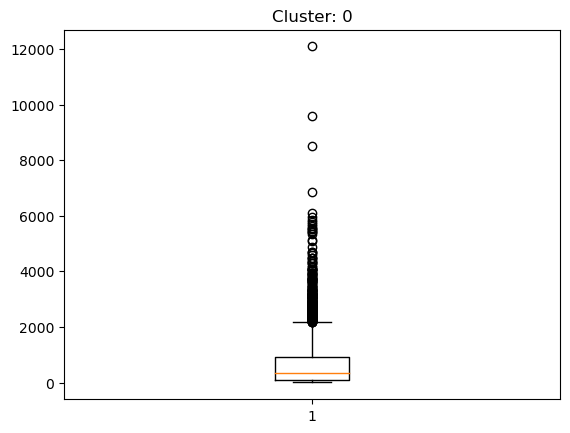

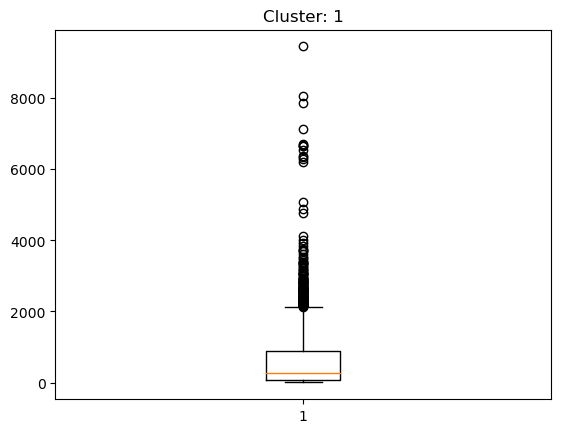

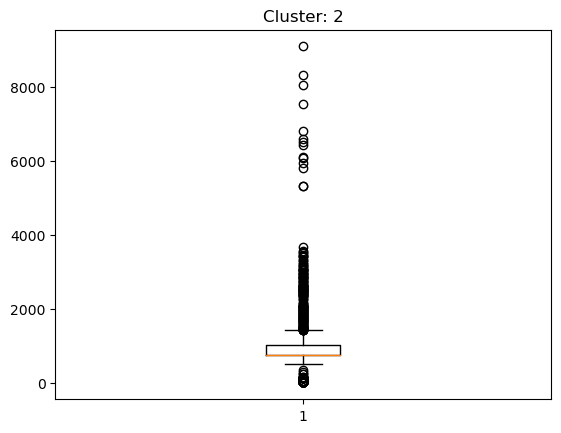

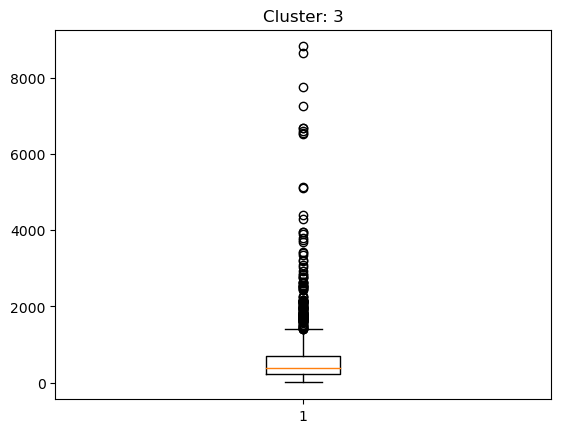

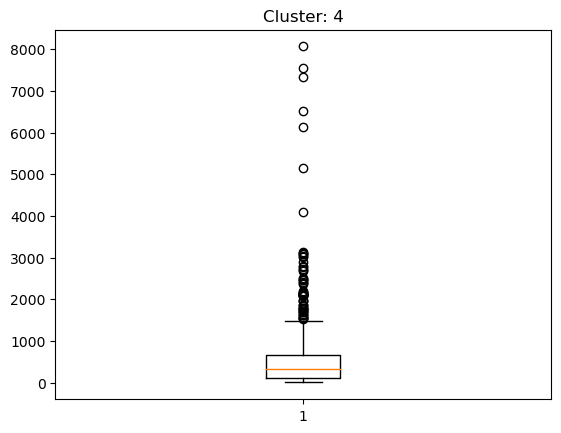

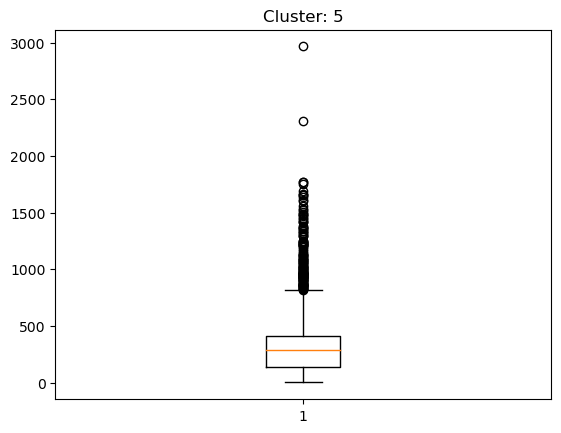

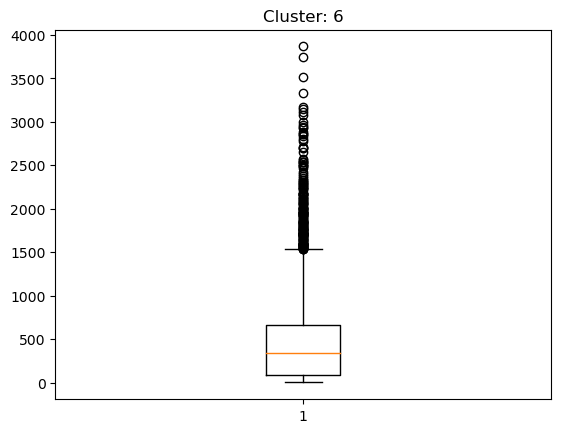

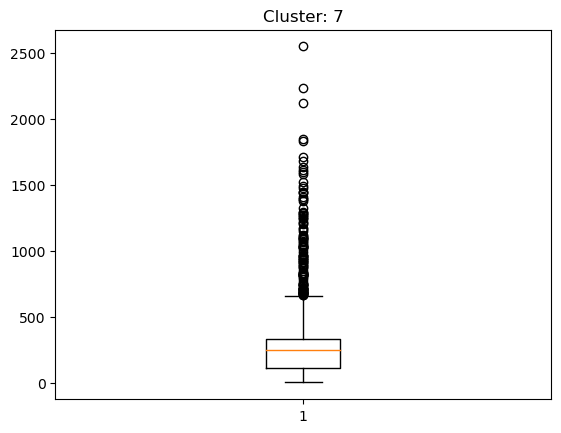

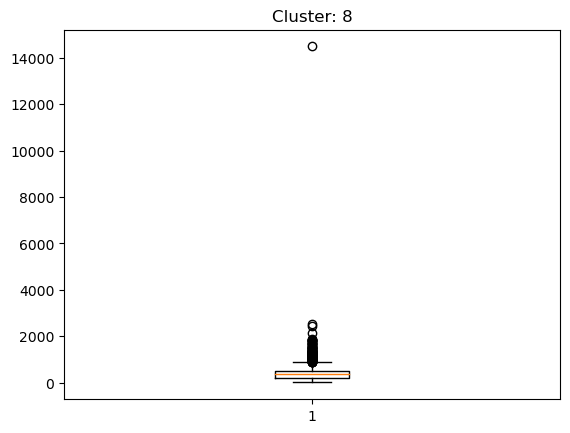

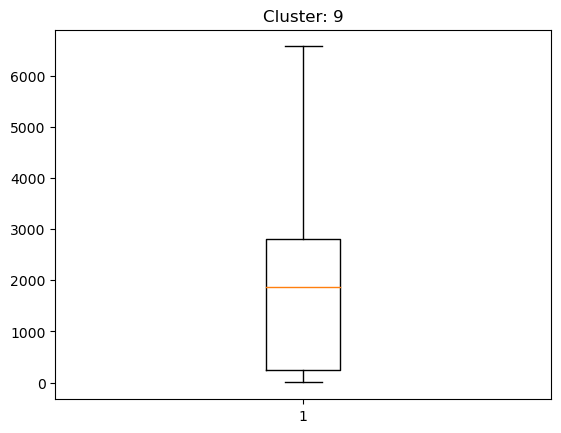

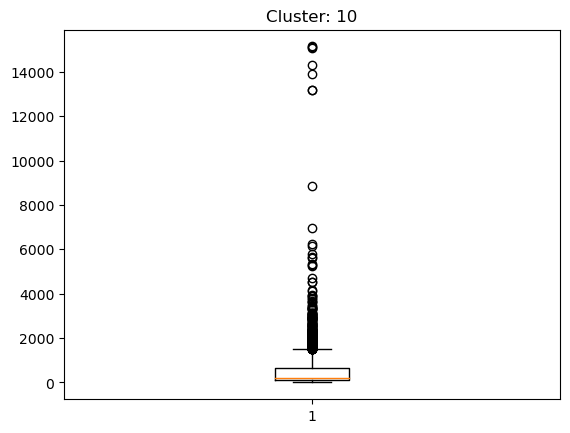

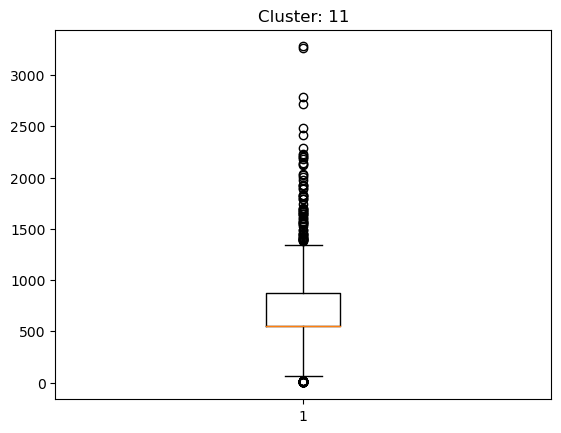

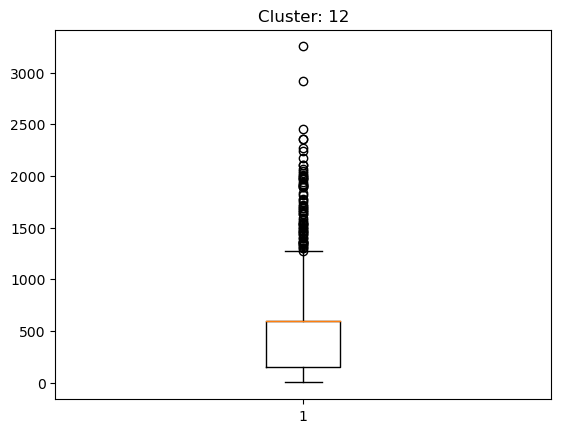

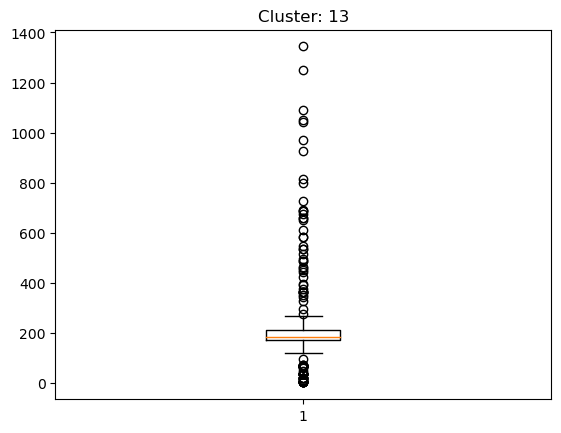

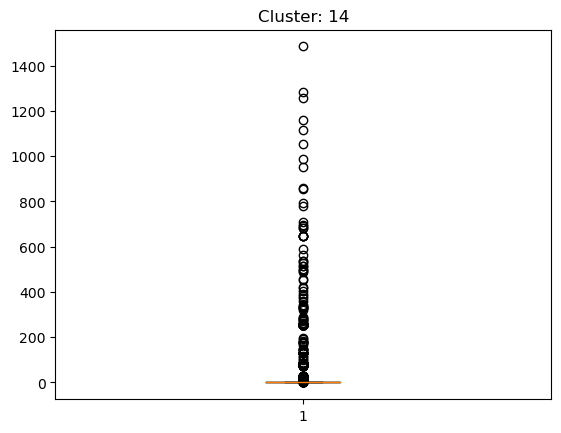

In [4]:
grouped = project.groupby('New_Community_Name')

# Boucle pour afficher les boîtes à moustaches de chaque sous-dataframe
for name, group in grouped:
    plt.boxplot(group['Degree'])
#     sns.boxplot(x=group['Degree'], showfliers=False)
#     sns.stripplot(x=group['Degree'], color="gray", jitter=0.2)
    plt.title(f"Cluster: {name}")
    plt.show()

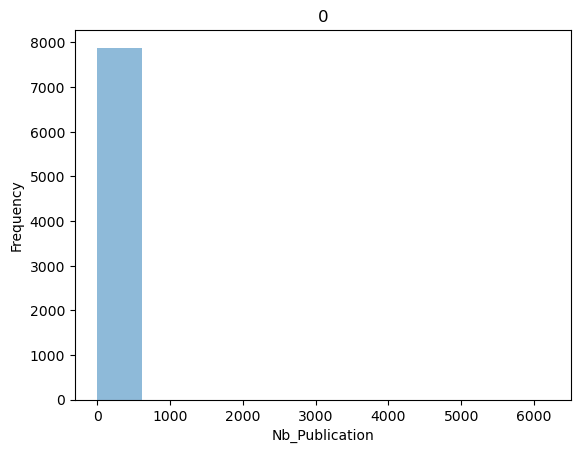

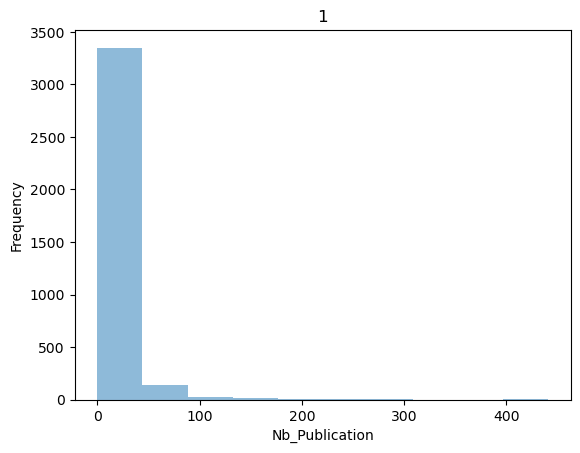

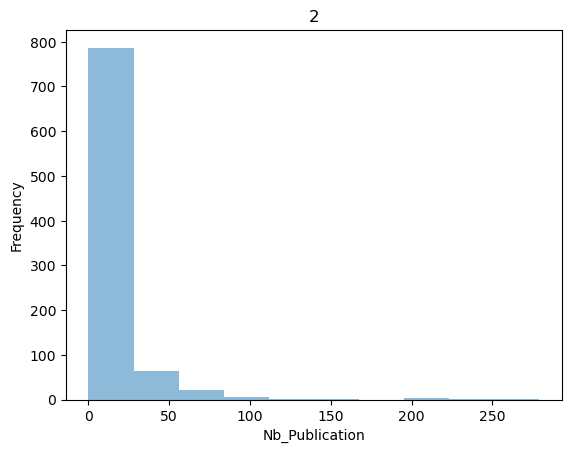

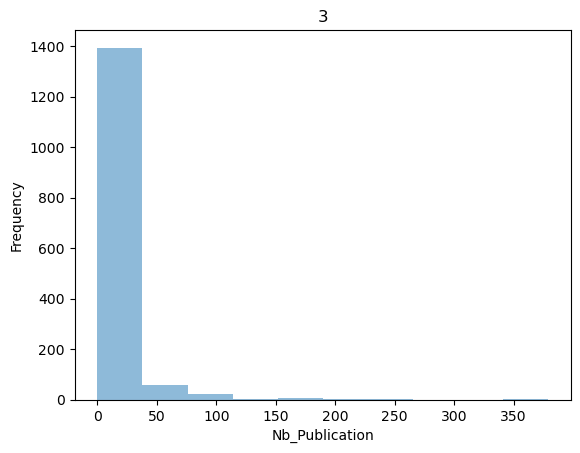

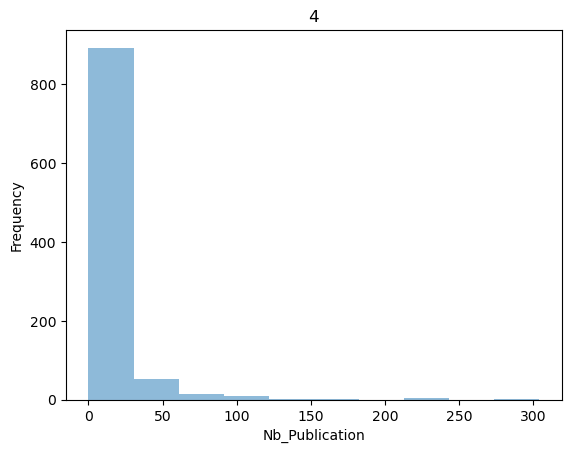

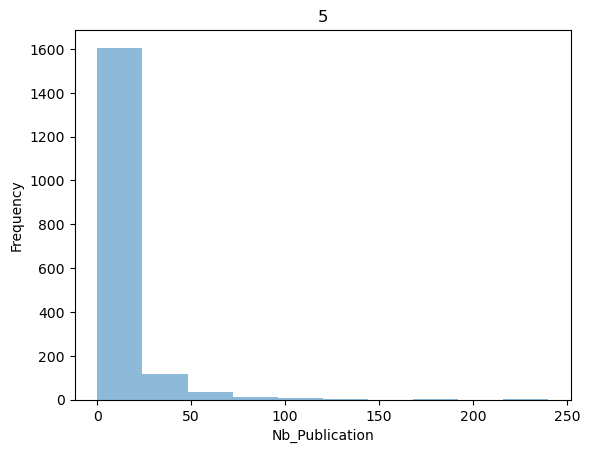

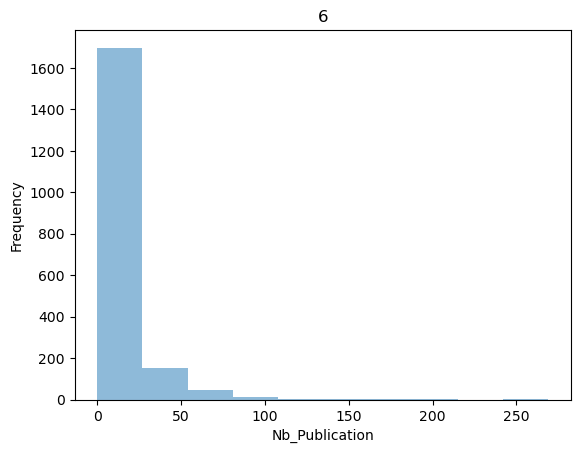

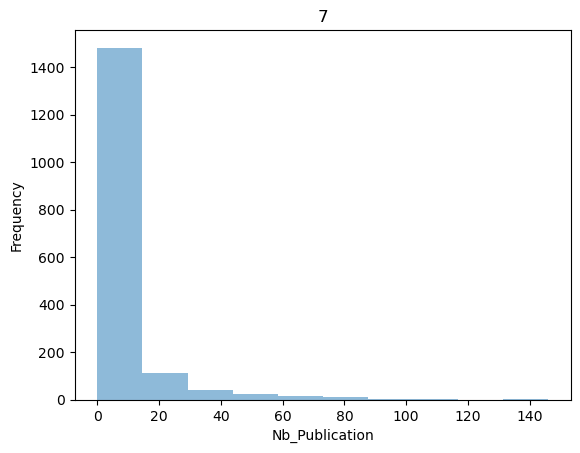

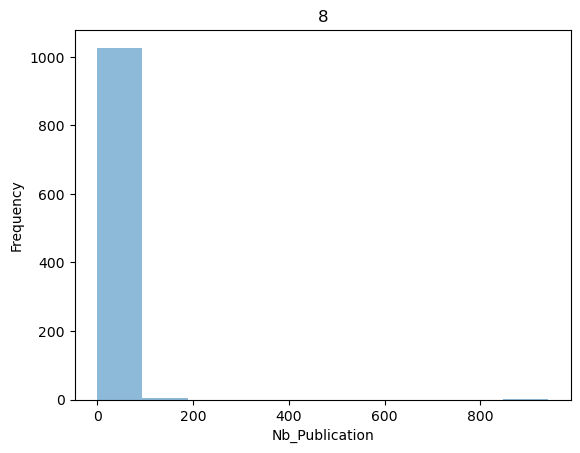

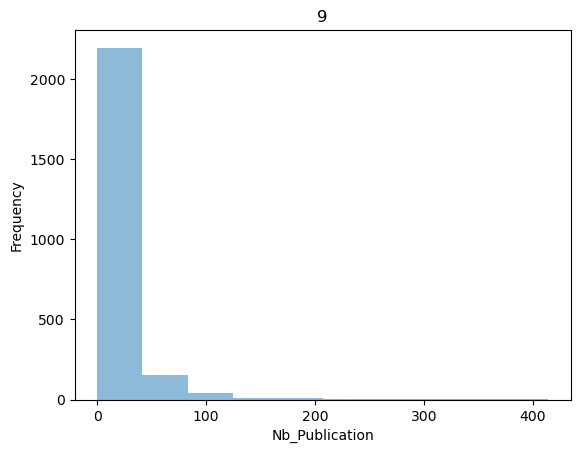

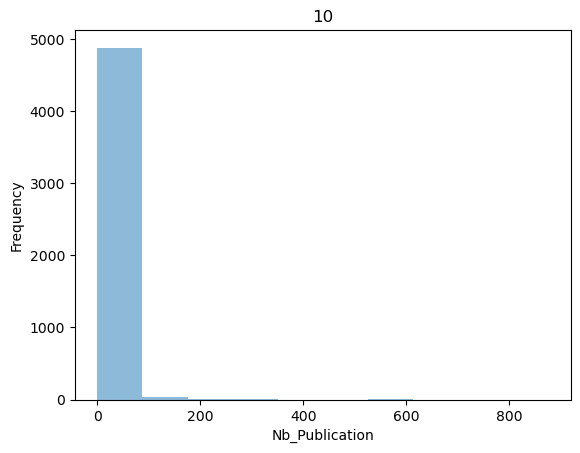

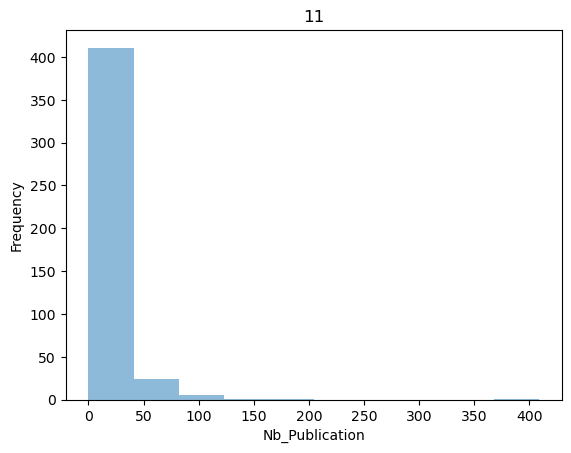

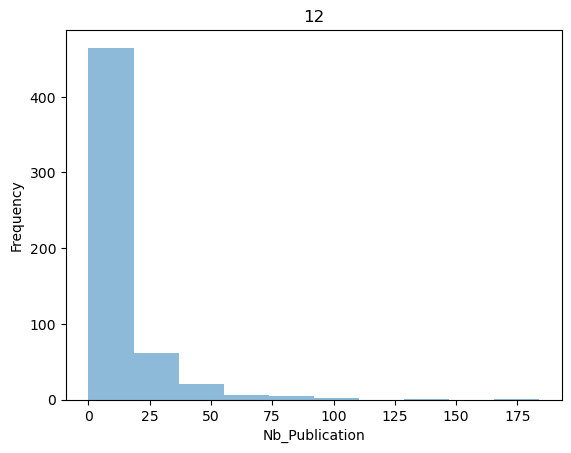

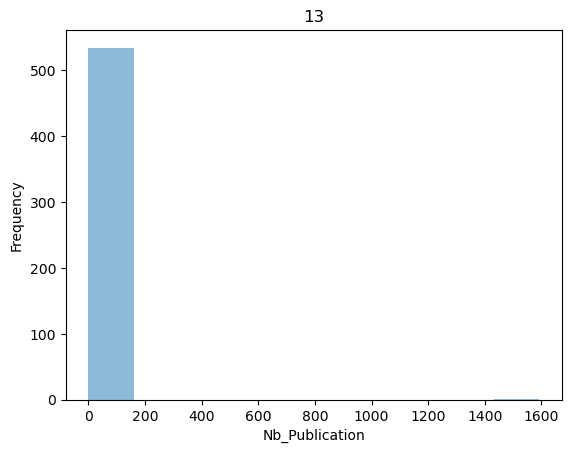

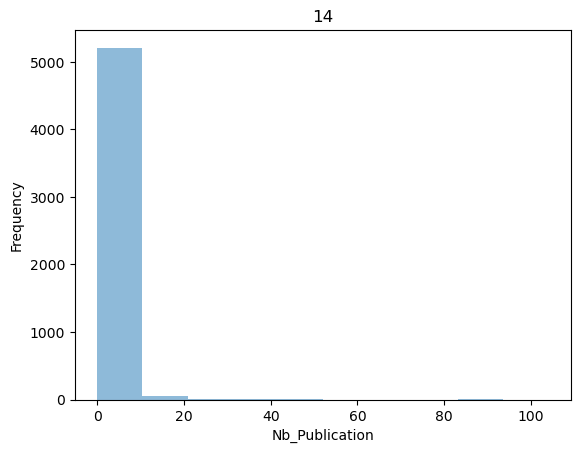

In [5]:
for name, group in grouped:
    group['Nb_Publication'].plot.hist(alpha=0.5)
    plt.xlabel('Nb_Publication')
    plt.title(name)
    plt.show()

In [53]:
#TODO: supprimer les cellules en dessous de celle-ci

In [38]:
project['cost_interval'] = pd.qcut(project['totalCost'], q=10)

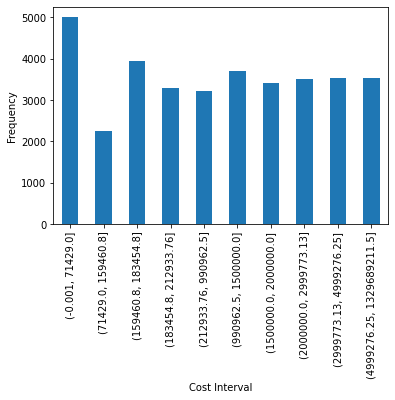

In [39]:
import matplotlib.pyplot as plt

project['cost_interval'].value_counts().sort_index().plot.bar()
plt.xlabel('Cost Interval')
plt.ylabel('Frequency')
plt.show()


In [42]:
project["Degree_Centrality"]

0        0.000000
1        0.012069
2        0.002092
3        0.003985
4        0.000254
           ...   
35376    0.000000
35377    0.000085
35378    0.000000
35379    0.000057
35380    0.000085
Name: Degree_Centrality, Length: 35381, dtype: float64

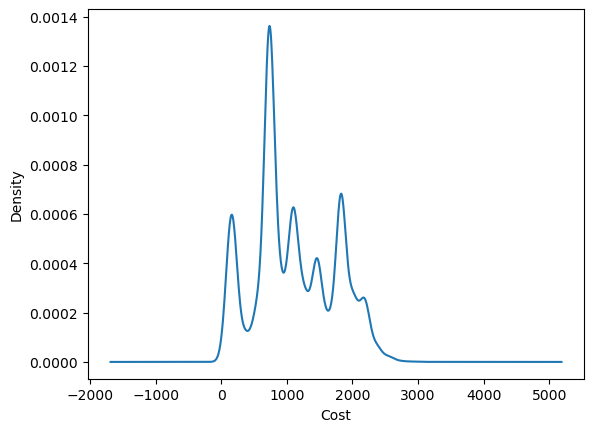

In [6]:
project['Project_Duration'].plot.density()
plt.xlabel('Cost')
plt.ylabel('Density')
plt.show()

In [48]:
corr_matrix = project.drop(columns=['id', 'acronym', 'status', 'title', 'startDate', 'endDate', 
       'legalBasis', 'topics', 'ecSignatureDate',
       'frameworkProgramme', 'masterCall', 'subCall', 'fundingScheme',
       'nature', 'objective', 'contentUpdateDate', 'rcn', 'grantDoi']).corr()

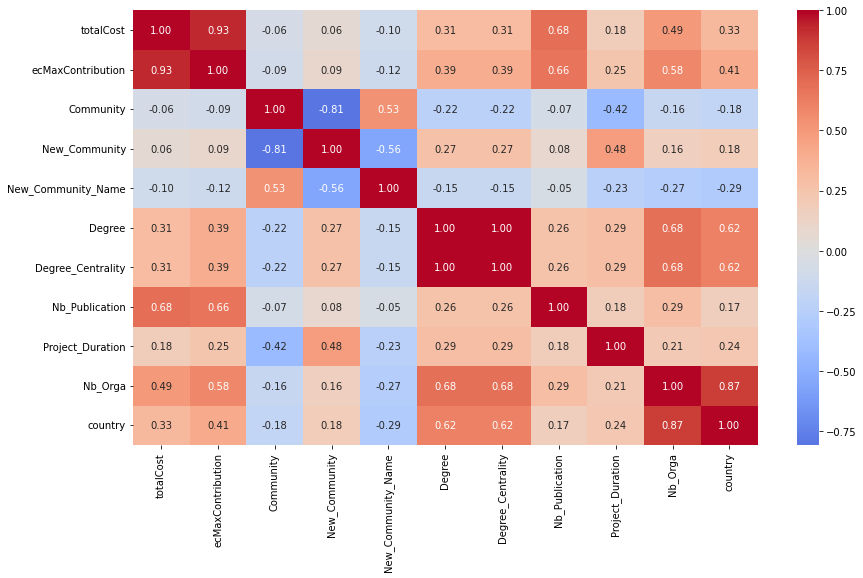

In [57]:
plt.figure(figsize=(14, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.show()

In [9]:
grouped_df = project.drop(columns=["objective", "Community", "New_Community", "id",
                                   "rcn", 'acronym', 'status', 'title', 'startDate',
                                   'endDate', 'legalBasis', 'topics', 'ecSignatureDate',
                                   'frameworkProgramme', 'masterCall', 'subCall',
                                   'fundingScheme', 'nature', 'contentUpdateDate',
                                   'grantDoi', "Cor_Country"]).groupby('New_Community_Name')
stats = grouped_df.agg(['mean']).round(2)

In [10]:
stats

,totalCost,ecMaxContribution,Degree,Degree_Centrality,Nb_Publication,Project_Duration,Nb_Orga,country
,mean,mean,mean,mean,mean,mean,mean,mean
New_Community_Name,,,,,,,,
0,4442604.24,3317777.79,643.25,0.02,9.96,1125.89,9.29,4.76
1,2228130.35,1897627.11,622.51,0.02,9.77,1179.82,6.01,3.40
2,2046766.93,1833709.42,987.98,0.03,10.57,1262.35,4.48,2.62
3,1880888.25,1723942.39,632.64,0.02,9.78,1237.25,4.37,2.75
4,1652314.79,1571766.26,544.37,0.02,9.77,1339.55,2.99,1.92
5,1324852.41,1273782.62,333.37,0.01,8.42,1233.21,3.08,2.10
6,2072920.93,1832104.29,536.31,0.02,9.88,1254.22,4.72,2.90
7,1013375.37,964390.70,274.57,0.01,6.66,1148.05,3.04,2.13


In [ ]:
grouped_df = project.drop(columns="objective").groupby('New_Community_Name')
stats = grouped_df.agg(['mean', 'std'])